#### Gruppens frågeställningar 

- *Vilket år var Tysklands bästa år i OS?*
- *Vem är/var Tysklands bästa atlet?*
- *Vilken är/var Tysklands bästa sport*
- *Genomsnittliga egenskaper för medaljvinnare*


In [2]:
# Importera bibliotek för dataanalys och visualisering
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Läs in datasetet från CSV-filen
os_data = pd.read_csv("data/athlete_events.csv") 

### *Vilket år var Tysklands bästa år i OS?*
- *År*     *1992*
- *Medaljer*     *236st*

In [3]:
# Skapa en DataFrame med totala antalet medaljer per år för Tyskland
germany_medals = os_data[(os_data['NOC'] == 'GER') | (os_data['NOC'] == 'FRG')].groupby('Year')['Medal'].count().reset_index()
# Hitta det år då Tyskland hade flest medaljer
best_year = germany_medals.loc[germany_medals["Medal"].idxmax()]

# Skriv ut totala medaljer per år
print(f"The best medal year for Germany was:\n {best_year}")
print(f"Totala medaljer per år för Tyskland:\n{germany_medals}")


The best medal year for Germany was:
 Year     1992
Medal     236
Name: 19, dtype: int64
Totala medaljer per år för Tyskland:
    Year  Medal
0   1896     32
1   1900     45
2   1904     16
3   1906     30
4   1908     21
5   1912     53
6   1928     82
7   1932     57
8   1936    231
9   1952     52
10  1956     54
11  1960     98
12  1964    126
13  1968     61
14  1972    112
15  1976    110
16  1980      8
17  1984    166
18  1988    129
19  1992    236
20  1994     40
21  1996    124
22  1998     44
23  2000    118
24  2002     61
25  2004    149
26  2006     54
27  2008     99
28  2010     54
29  2012     94
30  2014     36
31  2016    159


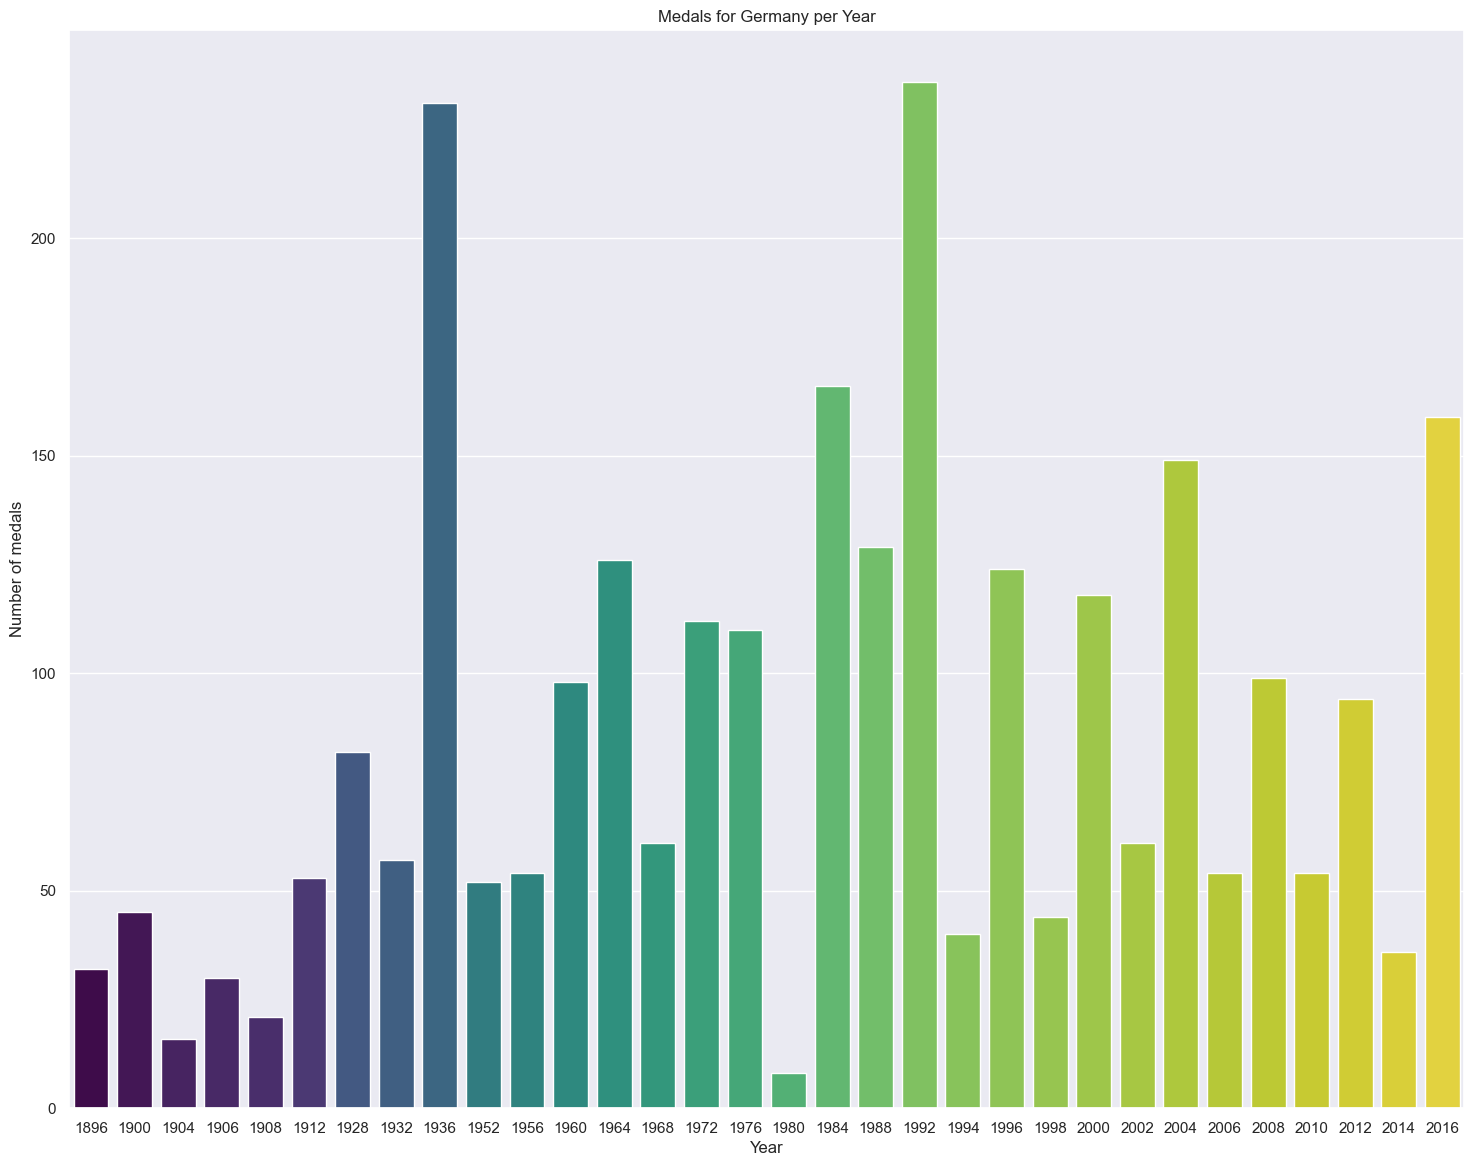

Tysklands bästa år i OS var 1992 med 236 medaljer.


In [4]:
# Plotta resultatet med seaborn
sns.set_theme(style="darkgrid")
plt.figure(figsize=(18, 14))
sns.barplot(x="Year", y="Medal", hue="Year", data=germany_medals, palette="viridis", legend=False)
plt.title("Medals for Germany per Year")
plt.xlabel("Year")
plt.ylabel("Number of medals")
plt.show()

# Skriv ut det bästa året
print(f"Tysklands bästa år i OS var {best_year['Year']} med {best_year['Medal']} medaljer.")

### *Vem är/var Tysklands bästa atlet?*
- *Franziska van Almsick med 10 medaljer*

In [5]:
# Skapa en DataFrame med totala antalet medaljer per idrottare för Tyskland
germany_athlete_medals = os_data[os_data['NOC'].isin(['GER', 'FRG'])].groupby('Name')['Medal'].count().reset_index()

# Hitta den idrottare som har flest medaljer
best_athlete = germany_athlete_medals.loc[germany_athlete_medals["Medal"].idxmax()]

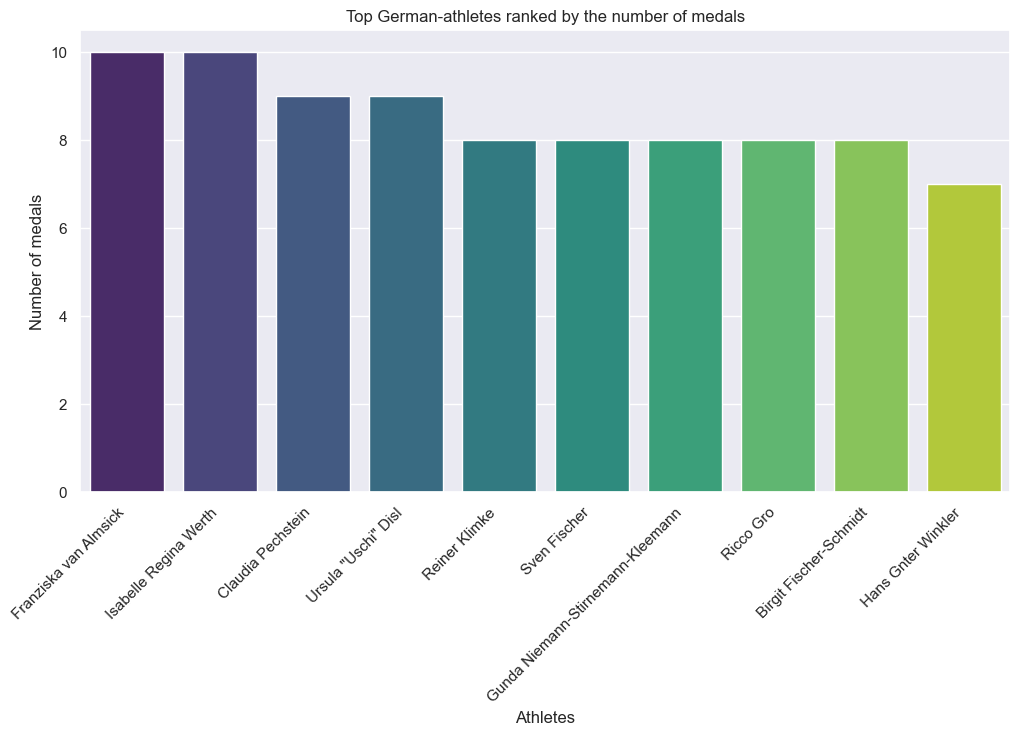

Tysklands bästa idrottare är Franziska van Almsick med 10 medaljer.


In [6]:
# Plotta resultatet med seaborn
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='Medal', hue='Name', data=germany_athlete_medals.sort_values(by='Medal', ascending=False).head(10), palette='viridis', legend=False)
plt.title("Top German-athletes ranked by the number of medals")
plt.xlabel("Athletes")
plt.ylabel("Number of medals")
plt.xticks(rotation=45, ha='right')
plt.show()

# Skriv ut den bästa idrottaren
print(f"Tysklands bästa idrottare är {best_athlete['Name']} med {best_athlete['Medal']} medaljer.")

### *Vilken är/var Tysklands bästa sport*

In [7]:
# Skapa en DataFrame med totala antalet medaljer per sport för Tyskland
germany_sport_medals = os_data[os_data['NOC'].isin(['GER', 'FRG'])].groupby('Sport')['Medal'].count().reset_index()

# Hitta den sport som har flest medaljer för Tyskland
best_sport = germany_sport_medals.loc[germany_sport_medals["Medal"].idxmax()]


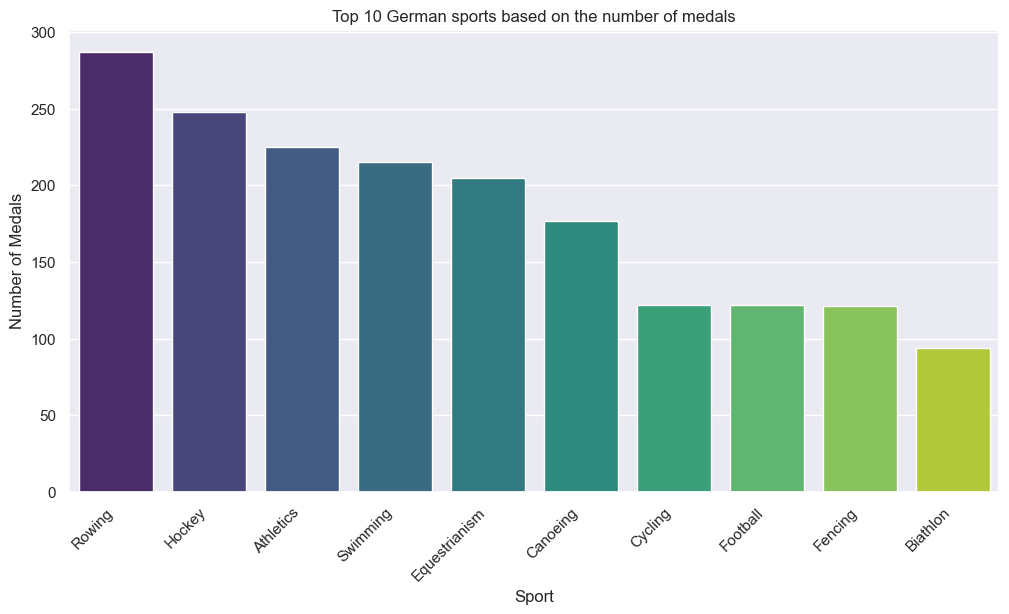

Germany's best sport is Rowing with 287 medals.


In [8]:
# Plotta resultatet med seaborn
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Sport', y='Medal', hue='Sport', data=germany_sport_medals.sort_values(by='Medal', ascending=False).head(10), palette='viridis', legend=False)
plt.title("Top 10 German sports based on the number of medals")
plt.xlabel("Sport")
plt.ylabel("Number of Medals")
plt.xticks(rotation=45, ha='right')
plt.show()

# Skriv ut den bästa sporten
print(f"Germany's best sport is {best_sport['Sport']} with {best_sport['Medal']} medals.")

### *Genomsnittliga egenskaper för medaljvinnare*

In [9]:
# Filtrera bara rader där det finns en medalj
medalists = os_data.dropna(subset=['Medal'])
 
# Beräkna genomsnittet för ålder, längd och vikt för medaljvinnare
average_age = medalists['Age'].mean()
average_height = medalists['Height'].mean()
average_weight = medalists['Weight'].mean()
 
# Skriv ut resultaten
print(f"Genomsnittlig ålder för medaljvinnare: {average_age:.2f} år")
print(f"Genomsnittlig längd för medaljvinnare: {average_height:.2f} cm")
print(f"Genomsnittlig vikt för medaljvinnare: {average_weight:.2f} kg")

Genomsnittlig ålder för medaljvinnare: 25.93 år
Genomsnittlig längd för medaljvinnare: 177.55 cm
Genomsnittlig vikt för medaljvinnare: 73.77 kg
